In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

import reconstruction

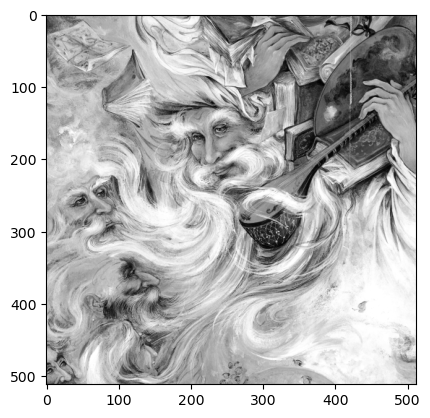

In [2]:
pic_path = 'test_pics\Downloaded Persian Miniatures - Cropped and Resized\Del polvo al polvo (Detalle) 1999 Obras maestras de la miniatura persa; Artista Profesor Mahmud Farshchian, Irn.jpg'

pic = reconstruction.createPicArrayFromPath (pic_path, '')

plt.imshow (pic, cmap='gray')
plt.show ()


In [3]:
def createNeighborhoodVector (pic: np.ndarray, coordinates: tuple) -> list:
    m, n = coordinates[0], coordinates [1]
    return           [pic [m, n-1], 
                      pic [m-1, n-1],
                      pic [m-1, n],
                      pic [m-1, n+1]]

def convertPicInt8ToFloat32 (pic: np.ndarray) -> np.ndarray:
    return np.array (pic, dtype='float32')

def normalizePic (pic: np.ndarray) -> np.ndarray:
    return pic / 255.0;

def createArrayofNeighborhoodVectors (pic: np.ndarray) -> np.ndarray:
    temp = []

    for i in range (pic[1:, 1:-1].shape [0]):
        for j in range (pic[1:, 1:-1].shape [1]):
            temp.append (createNeighborhoodVector (pic, (i, j)))

    neighborhood_vectors_array = np.array (temp, dtype='float32')

    return neighborhood_vectors_array

x1 = createNeighborhoodVector (pic, (2,2))

x1

[123, 128, 135, 139]

In [36]:
pic [1:, 1:-1].ravel ()

array([128, 135, 139, ..., 212, 210, 207], dtype=uint8)

In [60]:
y_values = np.array (pic[1:, 1:-1].ravel (), dtype='float32') / 255.0

y_values

array([0.5019608 , 0.5294118 , 0.54509807, ..., 0.83137256, 0.8235294 ,
       0.8117647 ], dtype=float32)

In [61]:
neighborhood_vectors_array = createArrayofNeighborhoodVectors (pic) / 255.0

neighborhood_vectors_array

array([[0.62352943, 0.8117647 , 0.5019608 , 0.4745098 ],
       [0.54901963, 0.5019608 , 0.4745098 , 0.4862745 ],
       [0.54901963, 0.4745098 , 0.4862745 , 0.49803922],
       ...,
       [0.8117647 , 0.8156863 , 0.8       , 0.80784315],
       [0.8156863 , 0.8       , 0.80784315, 0.83137256],
       [0.8039216 , 0.80784315, 0.83137256, 0.81960785]], dtype=float32)

In [62]:
neighborhood_vectors_array.shape

(260610, 4)

In [63]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential ()
model.add (Flatten (input_shape = (4,)))
model.add (Dense (6, activation='sigmoid'))
model.add (Dense (3, activation='sigmoid'))
model.add (Dense (1, activation='sigmoid'))


model.compile (optimizer='adam', loss = 'mean_squared_error')

c:\Users\PC\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [64]:
model.fit (neighborhood_vectors_array, y_values, epochs = 10)

Epoch 1/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 0.0253
Epoch 2/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 30s 4ms/step - loss: 0.0068
Epoch 3/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 0.0066
Epoch 4/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - loss: 0.0065
Epoch 5/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 0.0064
Epoch 6/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.0063
Epoch 7/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - loss: 0.0063
Epoch 8/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - loss: 0.0063
Epoch 9/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - loss: 0.0062
Epoch 10/10
8145/8145 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - loss: 0.0063


In [65]:
prediction = model.predict (neighborhood_vectors_array)

8145/8145 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step


In [66]:
prediction

array([[0.5312457 ],
       [0.52151644],
       [0.5287721 ],
       ...,
       [0.80826545],
       [0.82494956],
       [0.81380093]], dtype=float32)

In [67]:
prediction.shape

(260610, 1)

In [70]:
reconstructed = (prediction * 255.0).reshape (pic [1:, 1:-1].shape)

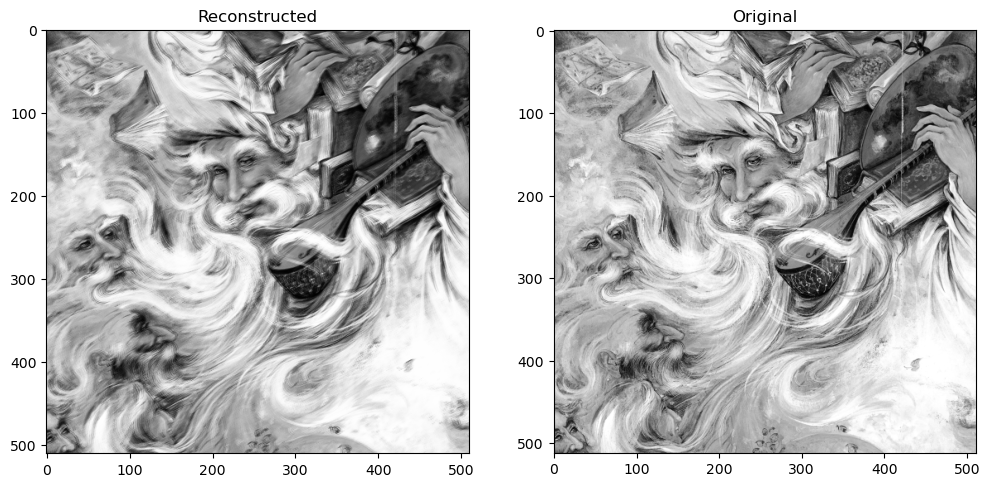

In [77]:
plt.figure (figsize=(12, 7))

plt.subplot (1,2,1)
plt.imshow (reconstructed, cmap='gray')
plt.title ('Reconstructed')

plt.subplot (1,2,2)
plt.imshow (pic, cmap='gray')
plt.title ('Original')

plt.show ()

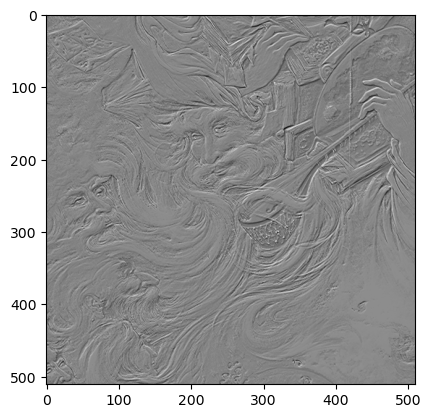

In [79]:
diff_matrix = reconstruction.createDiffMatrixFromMatrices (pic [1:, 1:-1], reconstructed)

plt.imshow (diff_matrix, cmap='gray')
plt.show ()